In [1]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing import image
from keras.layers import Input, Lambda ,Dense ,Flatten , Dropout , GlobalAveragePooling2D


In [2]:
#vgg 16 model
classifier_vgg16 = VGG16(input_shape= (64,64,3),include_top=False,weights='imagenet')
classifier_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
#not train top layers
for layer in classifier_vgg16.layers:
    layer.trainable = False

In [4]:
#adding extra layers for our class/images
main_model = classifier_vgg16.output
main_model = GlobalAveragePooling2D()(main_model)
main_model = Dense(1024,activation='relu')(main_model)
main_model = Dense(1024,activation='relu')(main_model)
main_model = Dense(512,activation='relu')(main_model)
main_model = Dropout(0.5)(main_model)
main_model = Dense(5,activation='softmax')(main_model)

In [5]:
#compiling
model = Model(inputs = classifier_vgg16.input , outputs = main_model)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Part 2 - Fitting the CNN to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#use the image data generator to import the images from the dataset
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
#makes sure you provide the same target as initialised for the image size
training_set = train_datagen.flow_from_directory('C:/Users/hp/Desktop/ml/dataset/train',
                                                 target_size=(64, 64),
                                                 batch_size=15,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('C:/Users/hp/Desktop/ml/dataset/val',
                                            target_size=(64, 64),
                                            batch_size=10,
                                            class_mode='categorical',
                                            shuffle=False)

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [8]:
#fit the model
#it will take some time to train
nb_train_samples=1190
nb_validation_samples=170
batch_size=5
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_steps=nb_validation_samples // batch_size
)


Epoch 1/5


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  7/238 ━━━━━━━━━━━━━━━━━━━━ 55s 240ms/step - accuracy: 0.2027 - loss: 1.6989 

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2877 - loss: 1.6692 - val_accuracy: 0.2000 - val_loss: 1.6719
Epoch 2/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3303 - loss: 1.6929 - val_accuracy: 0.4400 - val_loss: 1.4551
Epoch 3/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2881 - loss: 1.6223 - val_accuracy: 0.4400 - val_loss: 1.3132
Epoch 4/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4510 - loss: 1.3964 - val_accuracy: 0.6800 - val_loss: 1.1807
Epoch 5/5
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5187 - loss: 1.1869 - val_accuracy: 0.5600 - val_loss: 1.1449


In [9]:

model.save("C:/Users/hp/Desktop/ml/face_recog_vgg_new.h5")

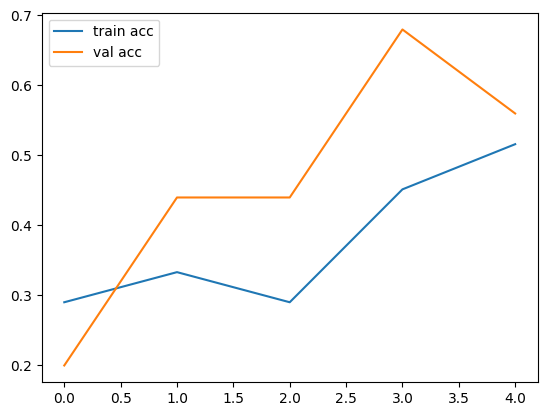

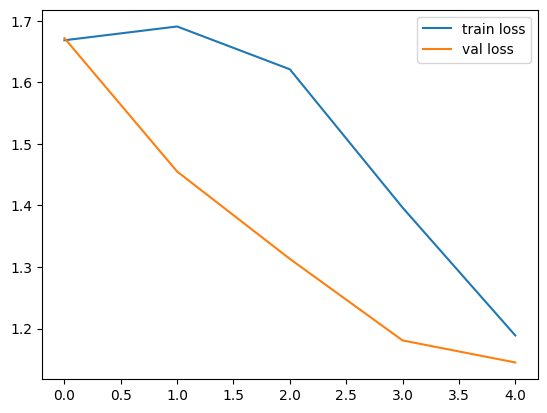

In [10]:
#PLOTTING accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , label = 'train acc')
plt.plot(history.history['val_accuracy'] , label = 'val acc')
plt.legend()
plt.show()

#PLOTTING loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , label = 'train loss')
plt.plot(history.history['val_loss'] , label = 'val loss')
plt.legend()
plt.show()

In [11]:
from keras.models import load_model
classifier = load_model(r"C:\Users\hp\Desktop\ml\face_recog_vgg_new.h5")

In [12]:
from PIL import Image 
import base64
from io import BytesIO
import json
import random
import cv2
import numpy as np

In [ ]:
import cv2
import numpy as np
from PIL import Image

# Loading the cascades
face_cascade = cv2.CascadeClassifier('C:/Users/hp/Desktop/ml/haarcascade_frontalface_default.xml')

def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns None
    
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if len(faces) == 0:
        return None
    
    # Crop the first face found
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        cropped_face = img[y:y+h, x:x+w]
        break  # Only take the first face found

    return cropped_face

# Load the image
image_path = r"C:\Users\hp\Desktop\ml\what.jpeg"
img = cv2.imread(image_path)

face = face_extractor(img)
if face is not None:
    # Resize the face to the size expected by your model
    face = cv2.resize(face, (64, 64))  # Change from (224, 224) to (64, 64)
    im = Image.fromarray(face, 'RGB')
    img_array = np.array(im)
    img_array = np.expand_dims(img_array, axis=0)
    
    pred = classifier.predict(img_array)
    print(pred)
    
    name = "None matching"
    
    if pred[0][0] > 0.5:
        name = 'ben_afflek'
    if pred[0][1] > 0.5:
        name = 'elton_john'
    if pred[0][2] > 0.5:
        name = 'jerry_seinfeld'
    if pred[0][3] > 0.5:
        name = 'madonna'
    if pred[0][4] > 0.5:
        name = 'mindy_kaling'
    
    cv2.putText(img, name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
else:
    cv2.putText(img, "No face detected", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
# Resize the image to fit in the display window (optional)
display_width = 800
display_height = 600
img_resized = cv2.resize(img, (display_width, display_height))

# Display the resized image
cv2.imshow('Image', img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Display the image with the prediction
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
[[6.8054805e-11 4.8577737e-02 1.4083000e-09 2.3099421e-08 9.5142221e-01]]


In [ ]:
# After prediction
pred = classifier.predict(img_array)
print(pred)

# Determine the predicted class name
class_names = ['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']
predicted_class = class_names[np.argmax(pred)]

# Print the suggested class
print(f"Suggested class: {predicted_class}")

# Annotate the image with the predicted class name
cv2.putText(img, predicted_class, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
